<a href="https://www.kaggle.com/code/pramodaher/major-project?scriptVersionId=162267007" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

* **Project Title : Online Retail Customer Segmentation.**
* **Project type- unsurpervised ML**

**Project summary**
In this project, our task was to identify major customer segments on a transnational data set that contained one-year
historical transactions for a UK-based online retail store. This would help the company segregate its customers based on
transaction data and help them in marketing decisions and strategy.
After basic exploration and cleaning the data we found relationships between features in EDA and then jumped into the
analysis part. RFM analysis helped us to identify the Platinum and Gold Customers who brings more profit for the Online
retail stores as well helped to focus on Silver and Broze type of customer by organising some attractive offers for them.
We implemented various unsupervised machine learning algorithm such as KMeans Cluster. Here to find the Optimal number of clusters we used
well as used a Elbow Visulizers by Yellow bricks from Scikit Learn library.

**Problem statement**
1. To identify major customer segments on a transnational data set
1. Data set contains all the transactions occurring between 1 st December 2010 and 9 th December 2011 for a UK based and registered non store online retail
1. The company mainly sells unique all occasion gifts
1. Many customers of the company are wholesalers

**Problem Description**
In this project, your task is to identify major customer segments on a transnational
data set which contains all the transactions occurring between 01/12/2010 and
09/12/2011 for a UK-based and registered non-store online retail. The company mainly
sells unique all-occasion gifts. Many customers of the company are wholesalers.

* **Data Description**
* **Attribute Information:**
* • InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* • StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* • Description: Product (item) name. Nominal.
* • Quantity: The quantities of each product (item) per transaction. Num
* • InvoiceDate: Invice Date and time. Numeric, the day and time when transaction was generated.
* • UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* • CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* • Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:

# loading the dataset
df = pd.read_excel('/kaggle/input/retail-major/Online Retail.xlsx')


In [3]:
# 5 records of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#checking bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#shape of dataset
df.shape

(541909, 8)

In [6]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Observations**
* Datatype of InvoiceDate is object need to convert it into datatime.
* If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
* There are null values in CustomerID and Description.

# **DATA CLEANING**

In [7]:
# Let's check the null values count.
df.isnull().sum().sort_values (ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

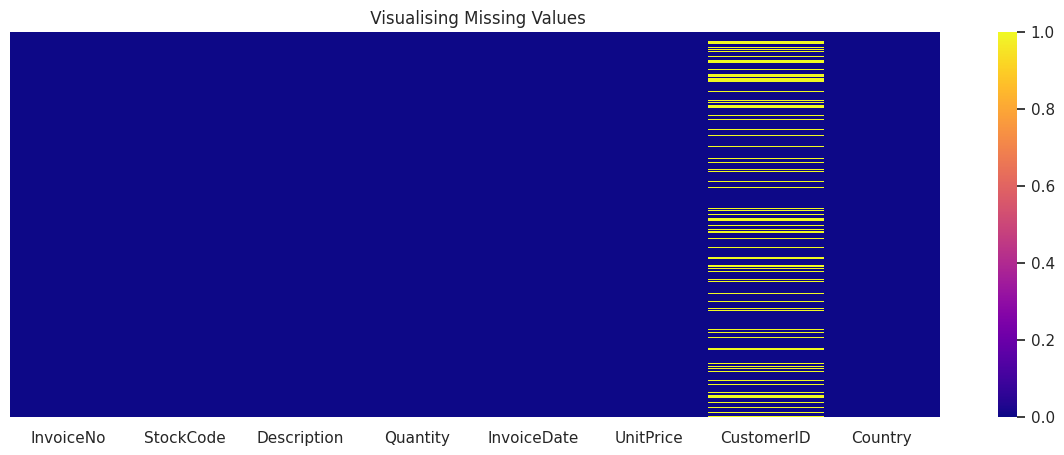

In [8]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap='plasma', annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

**Observations**
* *Missing values in CustomerID and Description columns.*
* *CustomerID is our identification feature so if its missing means other wont help us in analysis*
* *Dropping that all missing datapoints*

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(406829, 8)

*After removing null value from our dataset.*

*Now we have 406829 rows and 8 columns in our dataset.*



In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


* • *Here we can see that min value for Quantity column is negative.*
* • *UnitPrice has 0 as min value*
* • *Need to Explore these columns*

In [12]:
# dataframe have negative valiues in quantity.
#Here we observed that Invoice number starting with C has negative values 
df [df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
#changing the datatype to str
df ['InvoiceNo'] = df ['InvoiceNo'].astype('str')

In [14]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
df = df[~df ['InvoiceNo'].str. contains ('C')]

In [15]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len (df [df['UnitPrice']==0])

40

In [16]:
#taking unitprice values greater than 0.
df=df [df ['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [18]:
df.shape

(397884, 8)

# **FEATURE ENGINEERING**

In [19]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
df ["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [20]:
df ["year"] = df ["InvoiceDate"].apply(lambda x: x.year)
df ["month_num"] = df ["InvoiceDate"].apply(lambda x: x.month)
df ["day_num"] = df ["InvoiceDate"].apply(lambda x: x.day)
df [ "hour"] = df ["InvoiceDate"].apply(lambda x: x.hour)
df ["minute"] = df ["InvoiceDate"].apply(lambda x: x.minute)

In [21]:
#extracting month from the Invoice date
df [ 'Month']=df ['InvoiceDate'].dt.month_name()

In [22]:
#extracting day from the Invoice date
df [ 'Day']=df['InvoiceDate'].dt.day_name()

In [23]:
df [ 'Total Amount']=df [ 'Quantity']*df [ 'UnitPrice']

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


# **EDA(Exploratory Data Analysis)**

In [25]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'Total Amount'],
      dtype='object')

**Description Name**

In [26]:
Description_df = df['Description'].value_counts().reset_index()
Description_df.columns = ['Description_Name', 'Count']
# Top 5 Description Name
Description_df.head()


,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396


<Axes: title={'center': 'Top 5 Product Name'}, xlabel='Description_Name', ylabel='Count'>

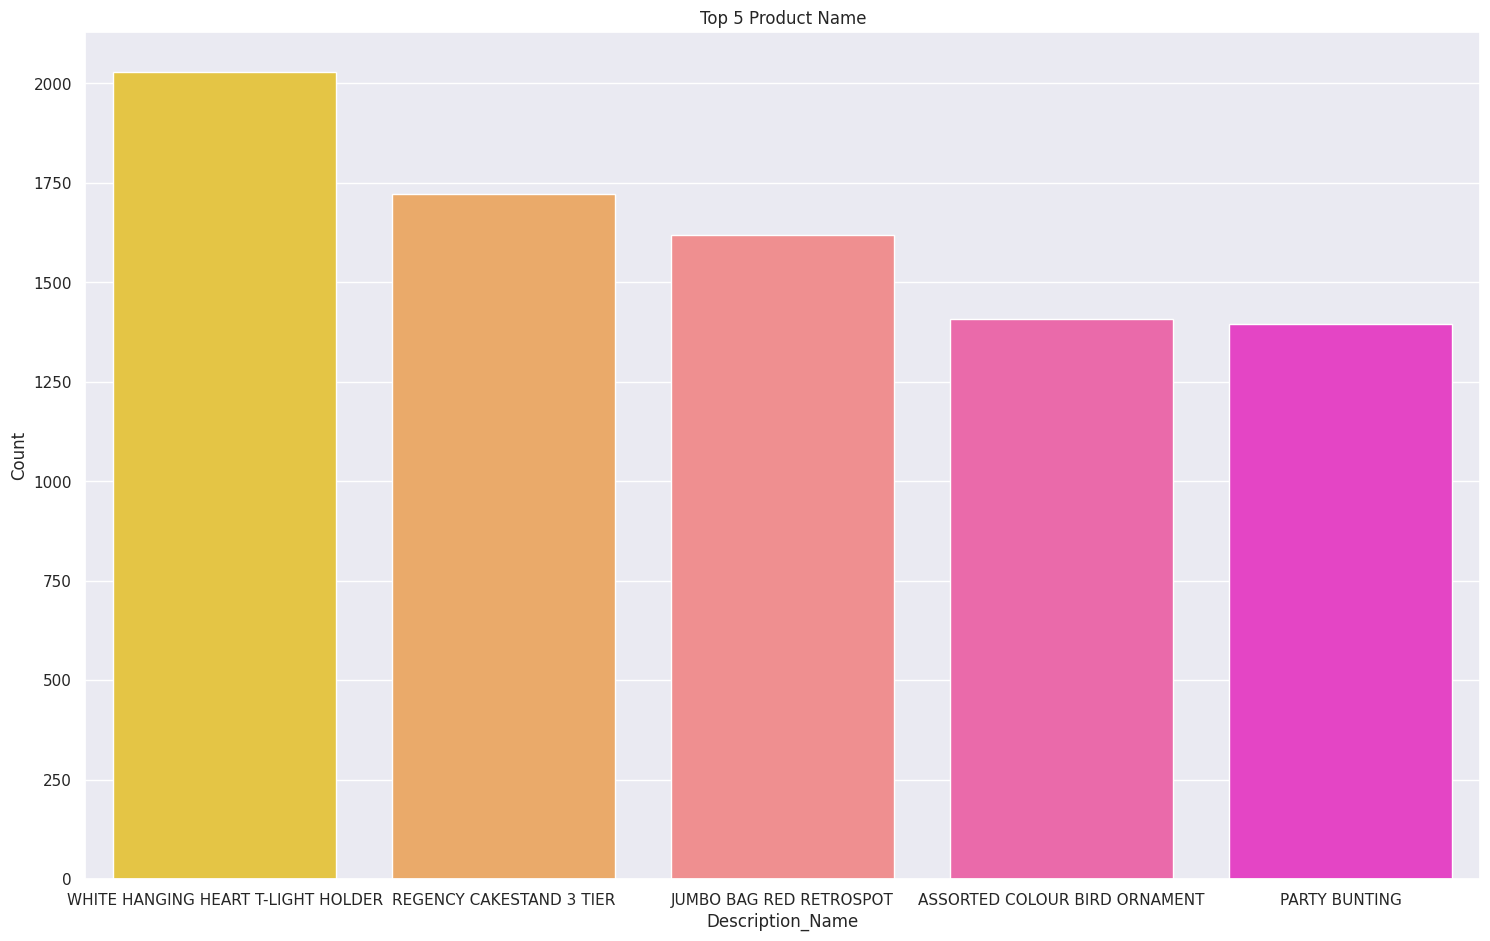

In [27]:
#plot top 5 product name
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5], palette='spring_r')

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [28]:
#bottom 5 description name
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


<Axes: title={'center': 'Bottom 5 product Name'}, xlabel='Description_Name', ylabel='Count'>

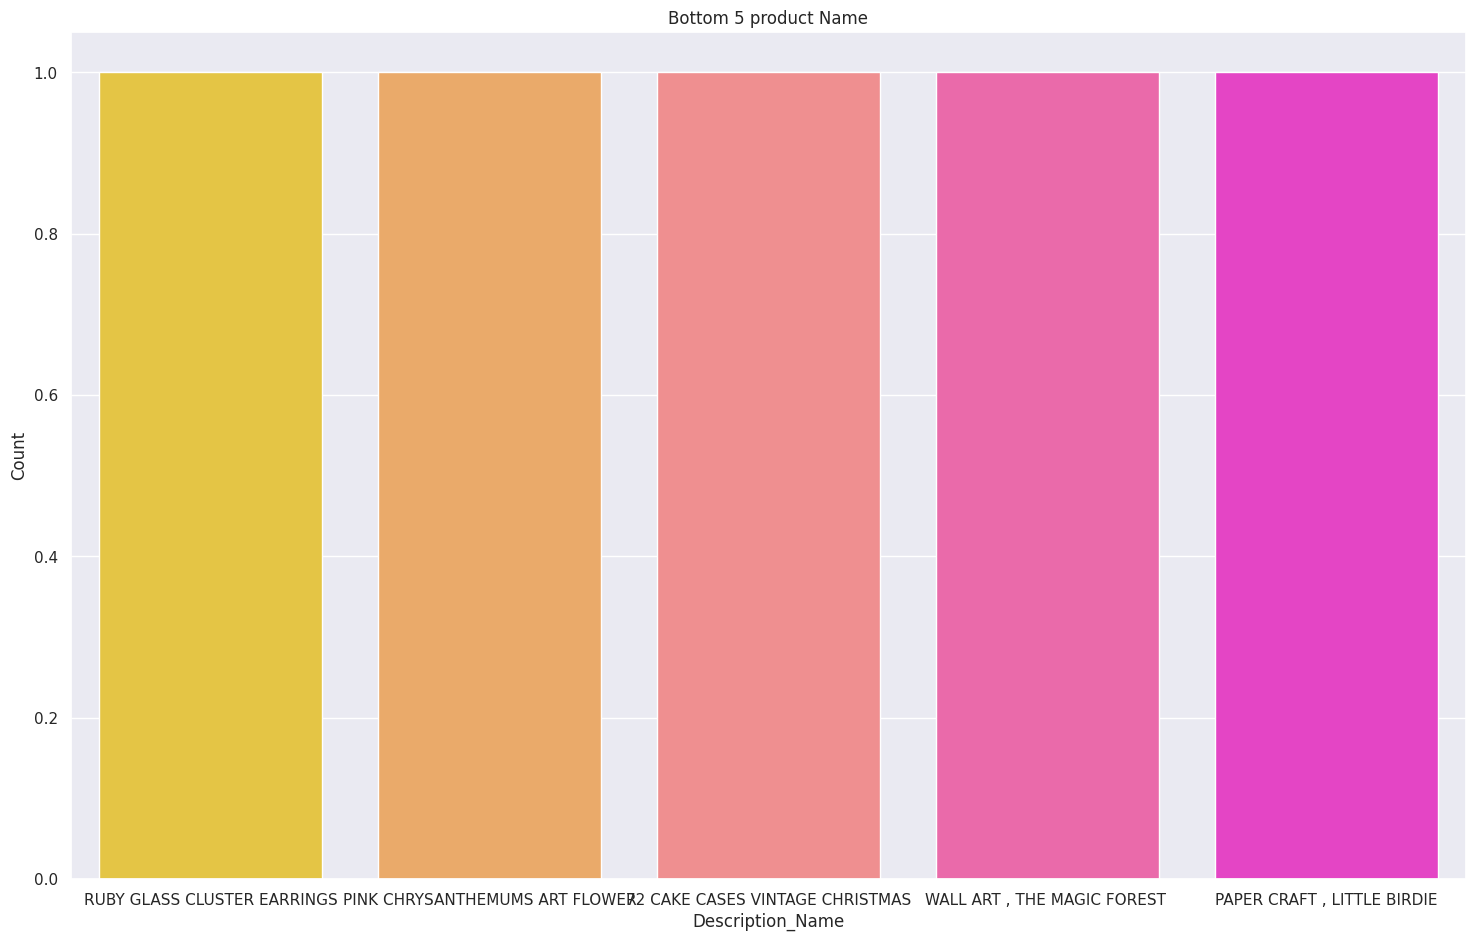

In [29]:

#plot bottom 5 product name
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:], palette='spring_r')

**Bottom 5 Product based on the selling are:**
 
* RUBY GLASS CLUSTER EARRINGS 
* PINK CHRYSANTHEMUMS ART FLOWER
* 72 CAKE CASES VINTAGE CHRISTMAS
* WALL ART , THE MAGIC FOREST
* PAPER CRAFT , LITTLE BIRDIE
 


**StockCode Name**

In [30]:
StockCode_df = df['StockCode'].value_counts().reset_index()
StockCode_df.columns = ['StockCode_Name', 'Count']
# Top 5 Description Name
StockCode_df.head()


,StockCode_Name,Count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396


<Axes: title={'center': 'Top 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

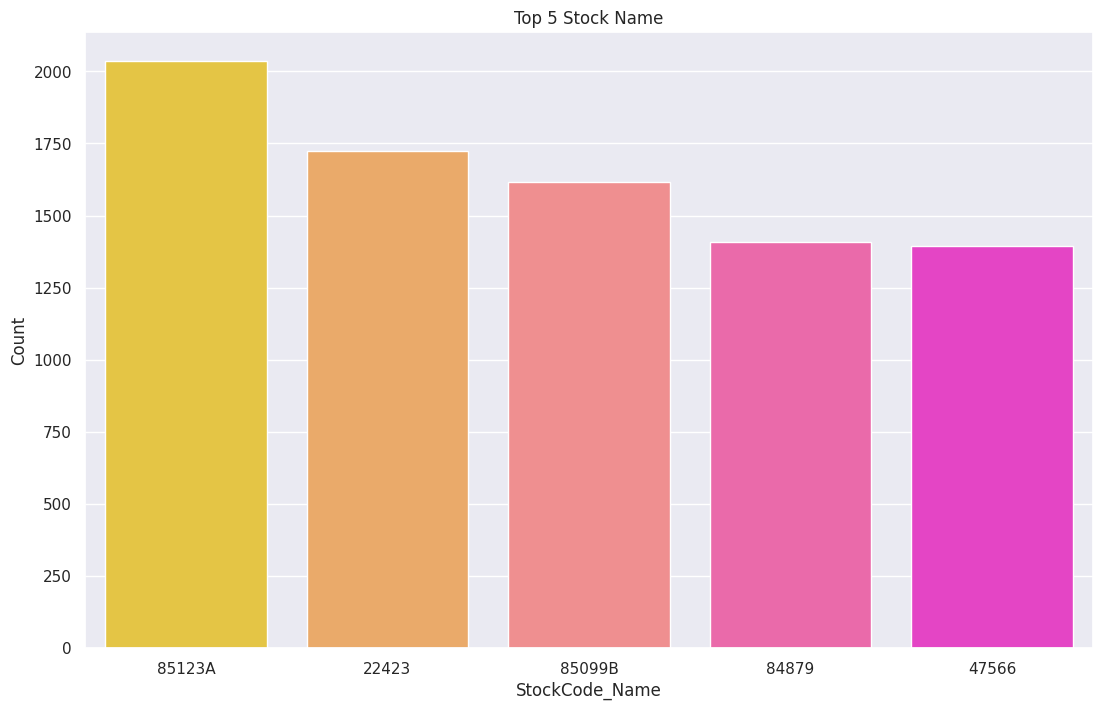

In [31]:
#plot top 5 stockcode name
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5], palette='spring_r')

**Top 5 Stock name based on selling are :**

1.85123A

2.22423

3.85099B

4.84879

5.4756

In [32]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


<Axes: title={'center': 'Bottom 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

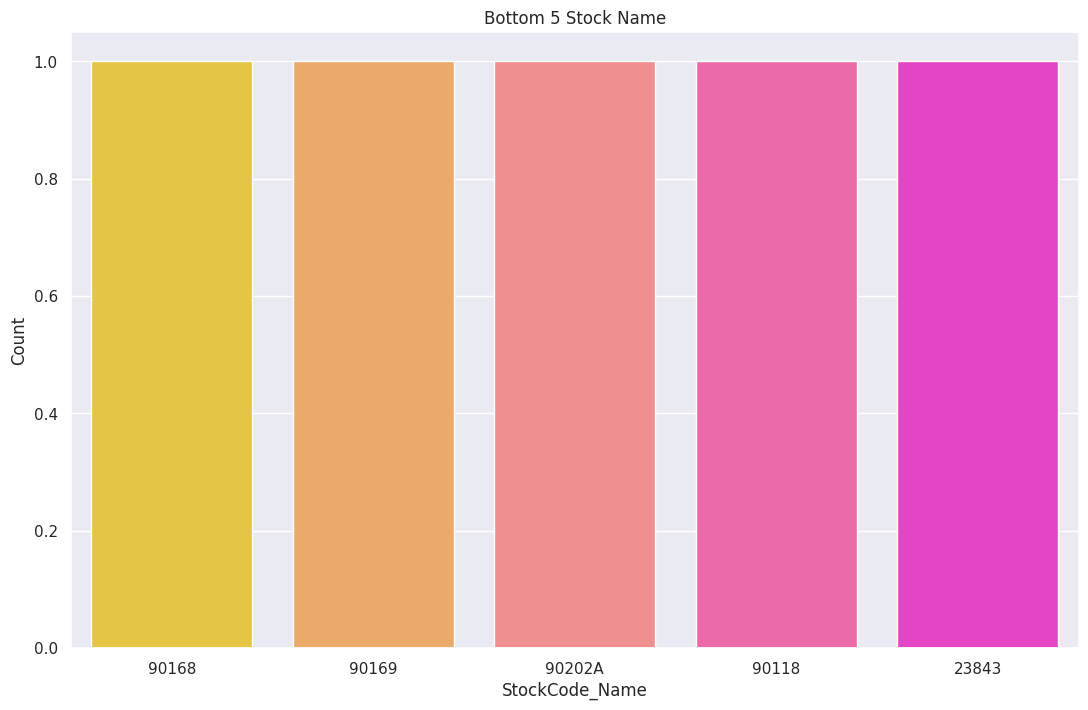

In [33]:
#plot bottom 5 stockcode name
plt.figure(figsize=(13,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:], palette='spring_r')

**Country Name**

In [34]:
country_df = df['Country'].value_counts().reset_index()
country_df.columns = ['Country_Name', 'Count']
# top 5 country name
country_df.head()


,Country_Name,Count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484


<Axes: title={'center': 'Top 5 Country based on the Most Numbers Customers'}, xlabel='Country_Name', ylabel='Count'>

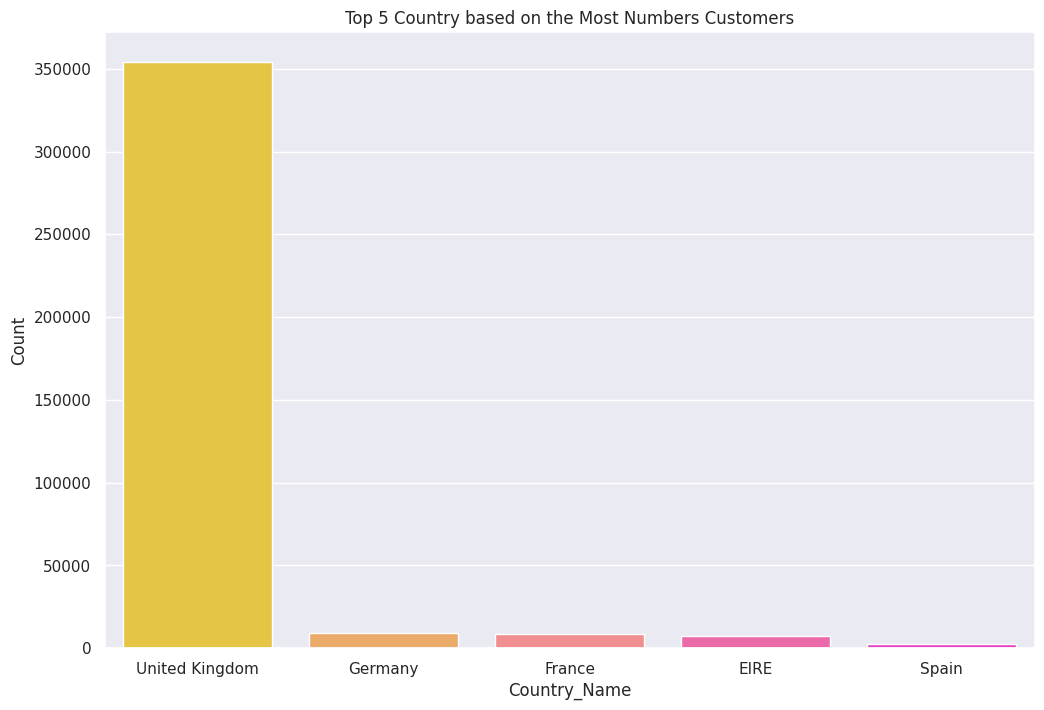

In [35]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5], palette='spring_r')

***From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain***

In [36]:
#bottom 5 country name
country_df.tail()


,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


<Axes: title={'center': 'Top 5 Country based least Numbers of  Customers'}, xlabel='Country_Name', ylabel='Count'>

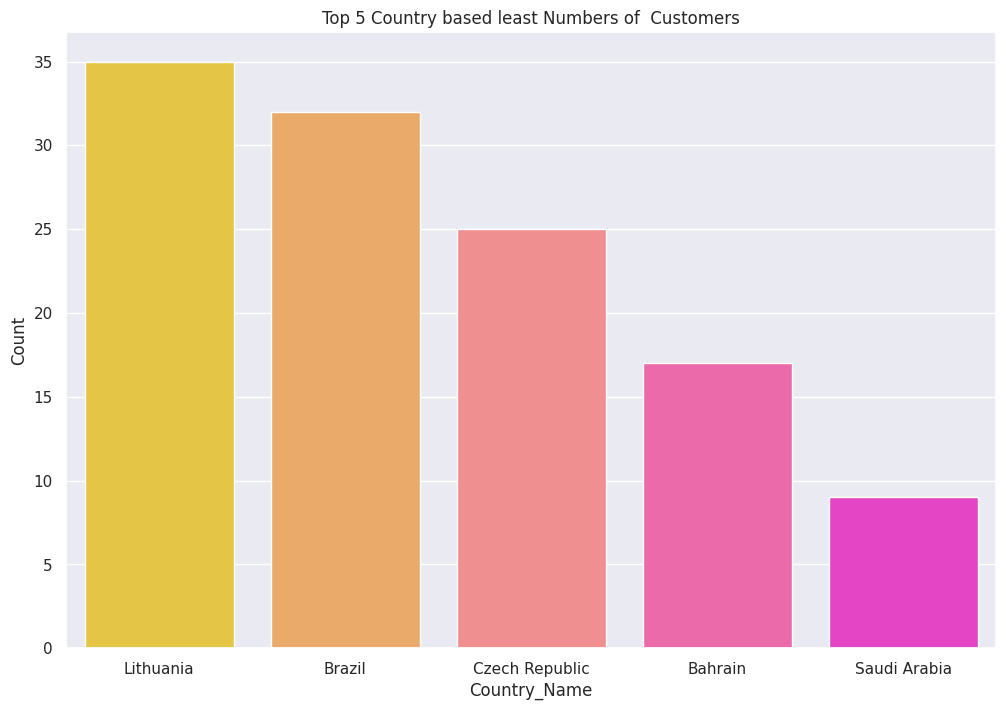

In [37]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:], palette='spring_r')

***From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia***

**Distribution Of Quantity**

<Axes: title={'center': 'distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

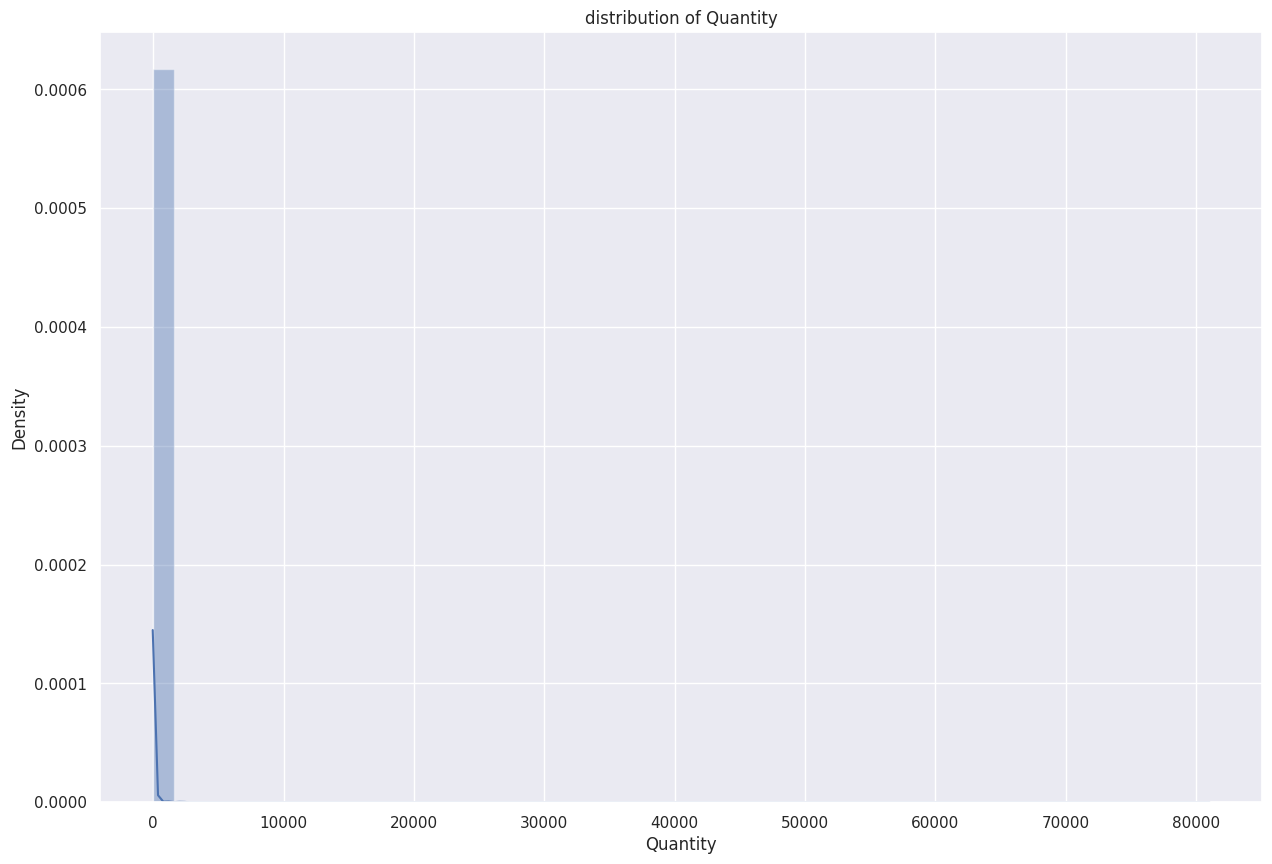

In [38]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'])

***Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.***

<Axes: title={'center': 'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

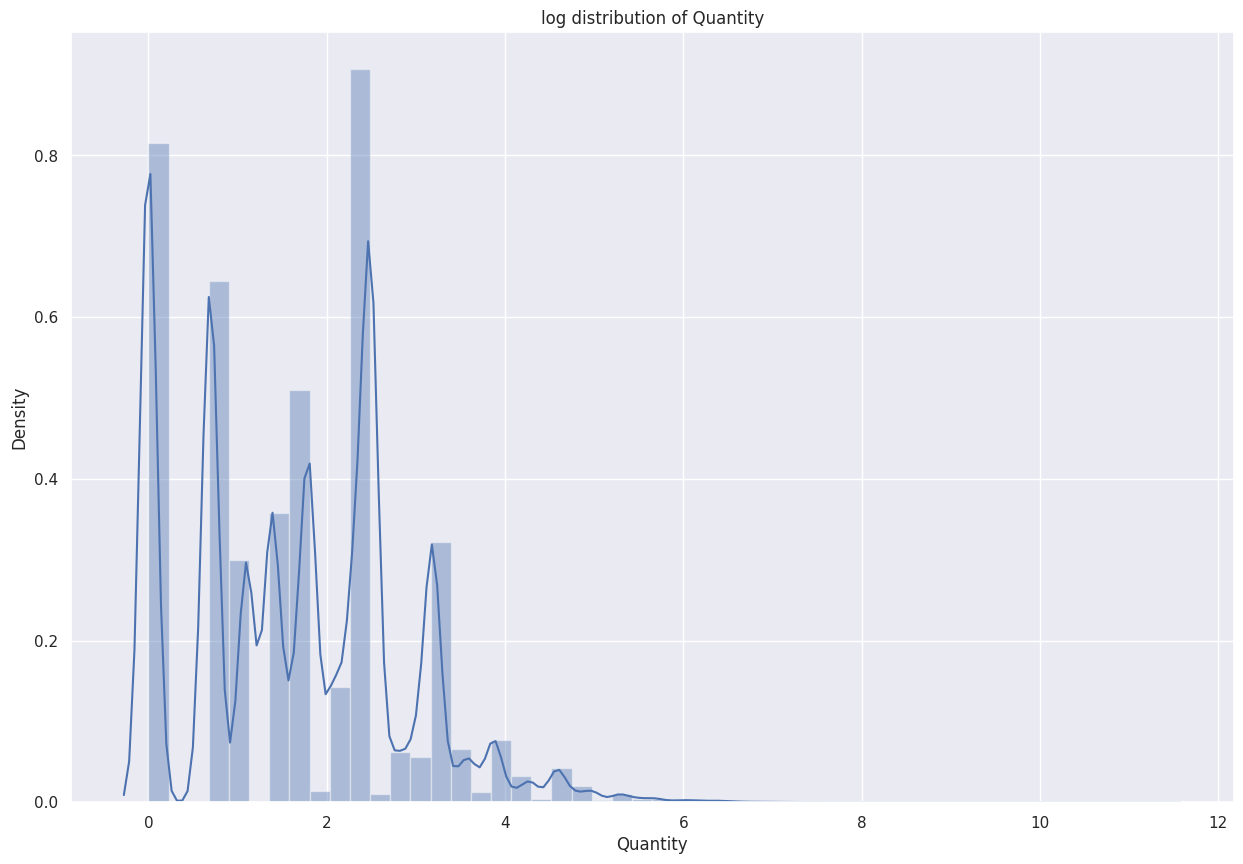

In [39]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))


**Distribution of Unit price**

<Axes: title={'center': 'UnitPrice distribution'}, xlabel='UnitPrice', ylabel='Density'>

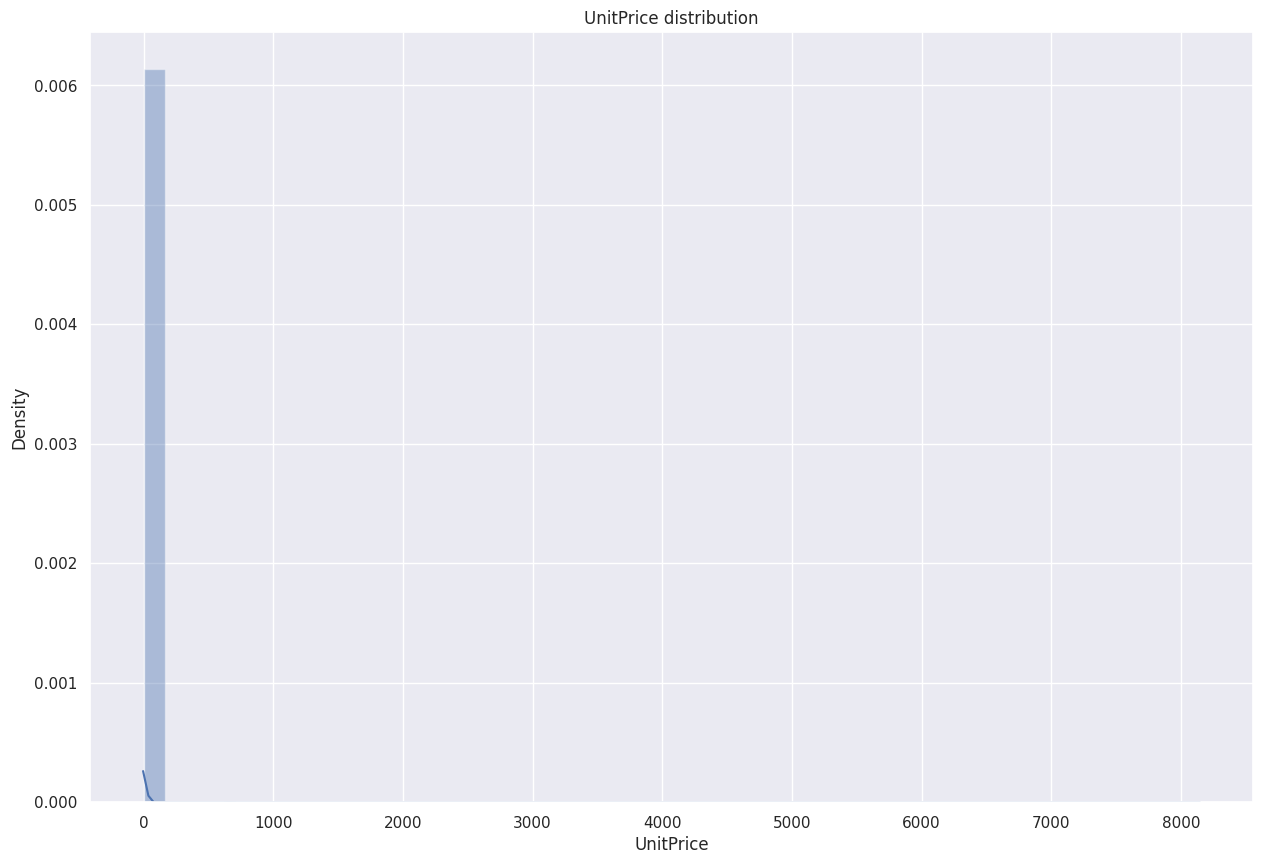

In [40]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'])

***From the distribution of unit price, we can say that most items have a lower price range.***

In [41]:
#checking for unit price less than 0
df[df['UnitPrice']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,Total Amount


In [42]:
df=df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


**Distribution of Total Amount**

<Axes: title={'center': 'distribution of Amount'}, xlabel='Total Amount', ylabel='Density'>

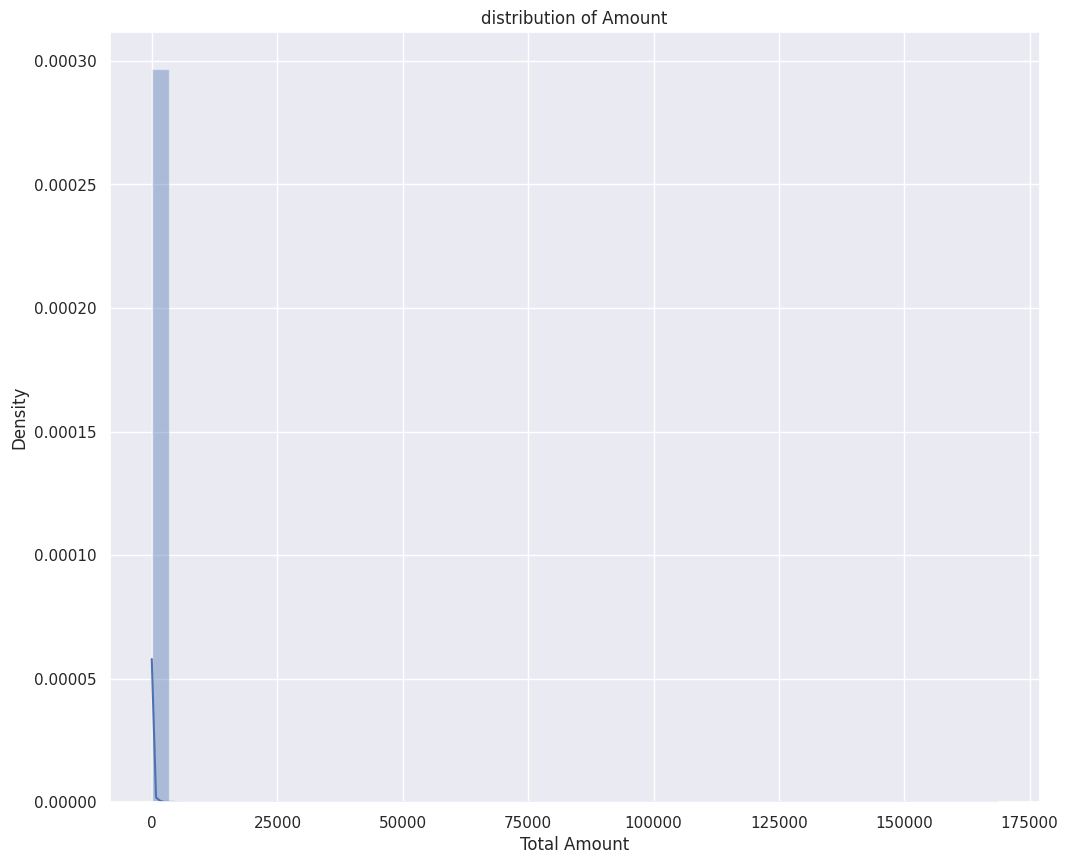

In [43]:
#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['Total Amount'])

**Months**

In [44]:
# Creating month dataframe
month_df = df['Month'].value_counts().reset_index()
month_df.columns = ['Month_Name', 'Count']
month_df


,Month_Name,Count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


<Axes: title={'center': 'Month'}, xlabel='Month_Name', ylabel='Count'>

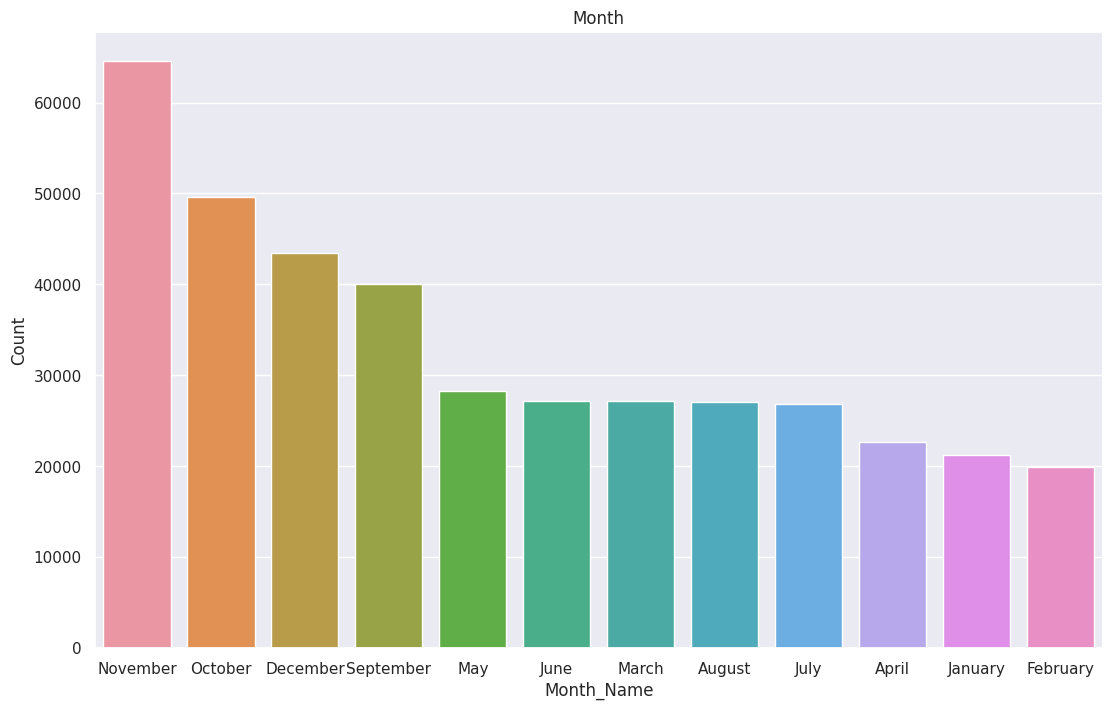

In [45]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

♦ *Most numbers of customers have purchased the gifts in the month of November, October and December.*

♦ *Least numbers of purchasing are in the month of April and February.

**Days**

In [46]:
# Creating day dataframe
day_df = df['Day'].value_counts().reset_index()
day_df.columns = ['Day_Name', 'Count']
day_df


,Day_Name,Count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


<Axes: title={'center': 'Days'}, xlabel='Day_Name', ylabel='Count'>

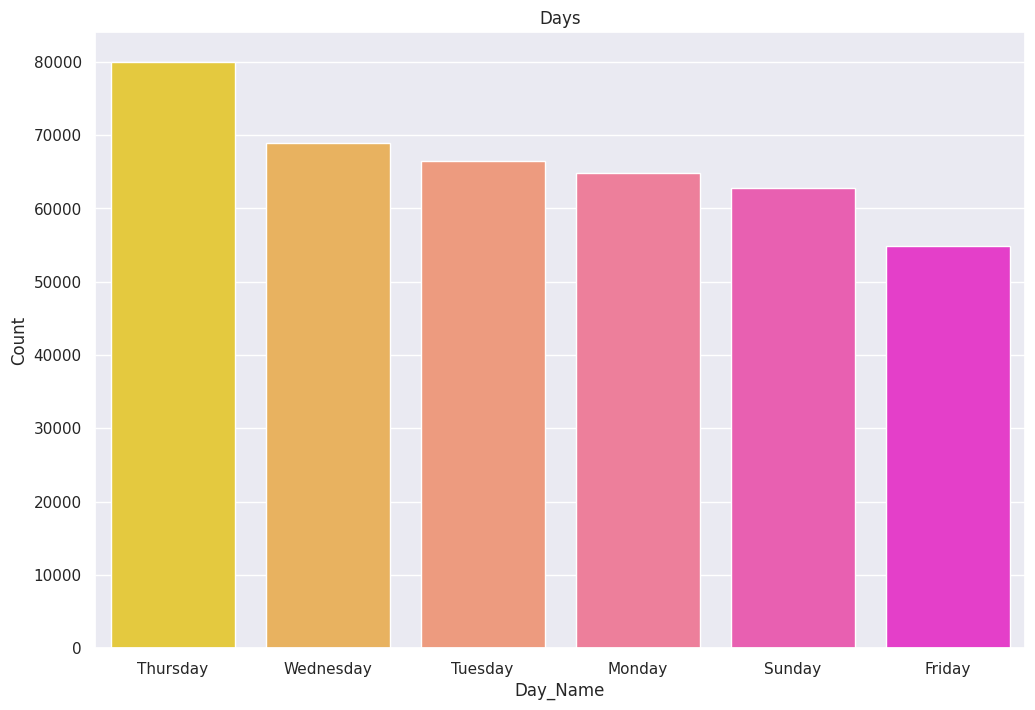

In [47]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Days')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r')

♦ *Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.*

**Hour**

In [48]:
# Creating hour dataframe
hour_df = df['hour'].value_counts().reset_index()
hour_df.columns = ['Hours', 'Count']
hour_df


,Hours,Count
0,12,72065
1,13,64026
2,14,54118
3,11,49084
4,15,45369
5,10,37997
6,16,24089
7,9,21944
8,17,13071
9,8,8690


<Axes: title={'center': 'Hour'}, xlabel='Hours', ylabel='Count'>

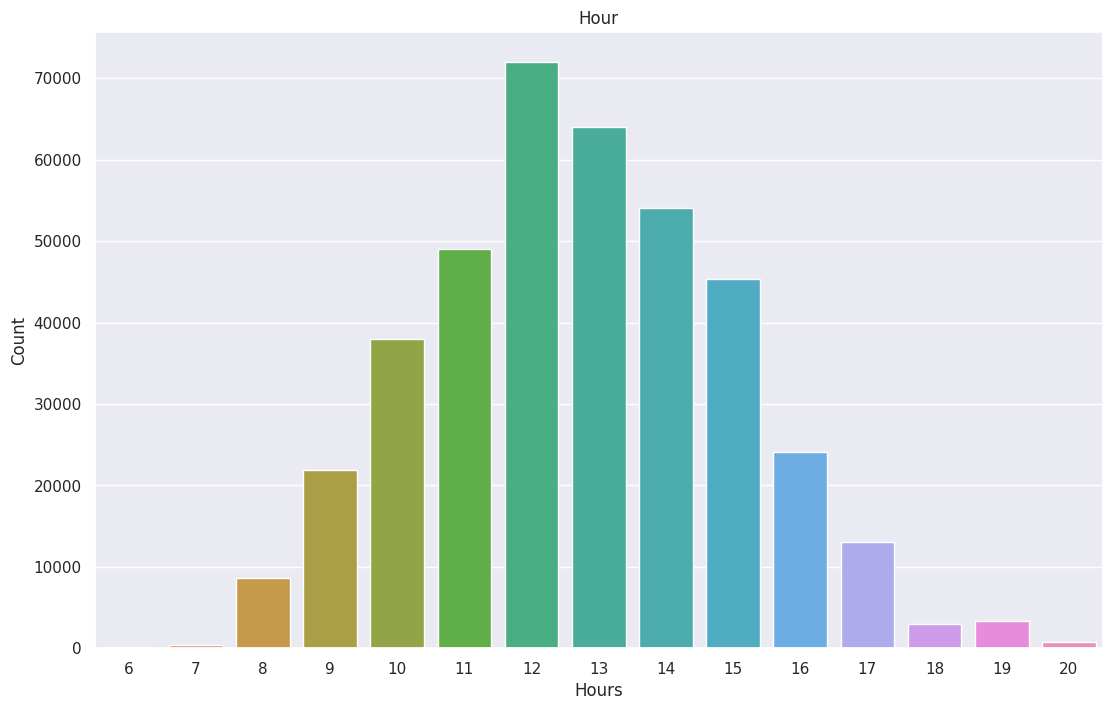

In [49]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hours',y='Count',data=hour_df)

♦ *From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.*

In [50]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [51]:
df['Time_type']=df['hour'].apply(time_type)


<Axes: title={'center': 'Time_type'}, xlabel='Time_type', ylabel='count'>

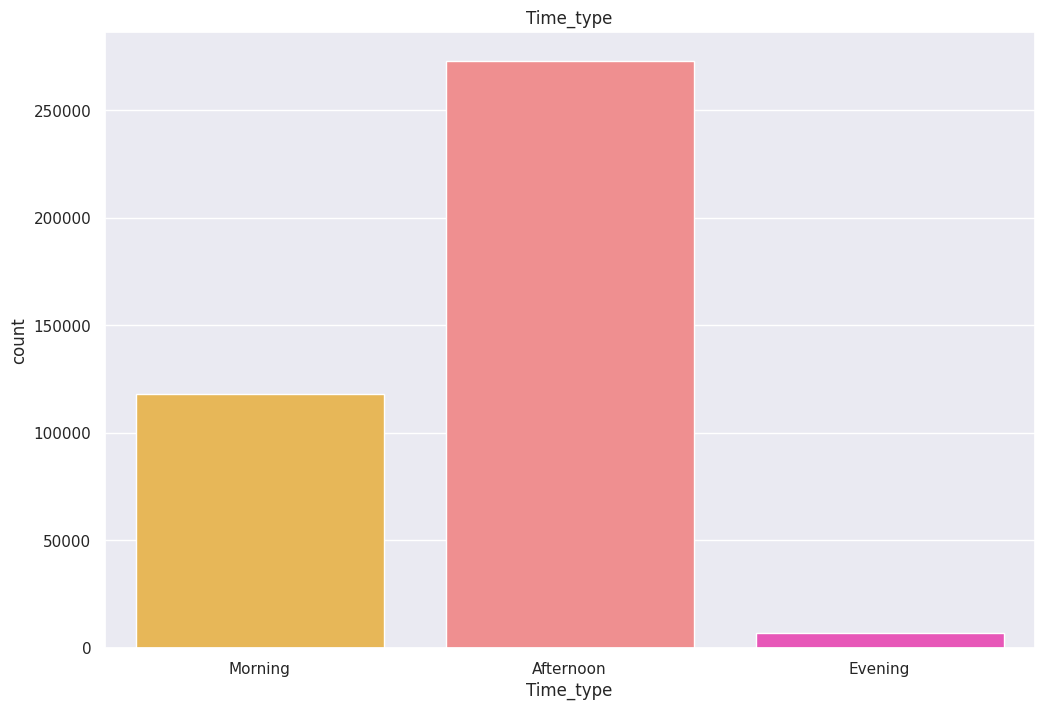

In [52]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df, palette='spring_r')

♦ *Most of the customers have purchased the items in Afternoon.*

♦ *Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.*

# **Create the RFM model (Recency, Frequency,Monetary value)**

> RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.
> 
RFM stands for the three dimensions:

* **Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary – How much do they spend?**

> Recency - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.
> 
> Frequency - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.
> 
> Monetary - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.**

**Why it is Needed?**
*RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above
three factors RECENCY, Frequency, and Monetary.*
*The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they
can engage with each group with different targeted marketing strategies.*

In [53]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [54]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

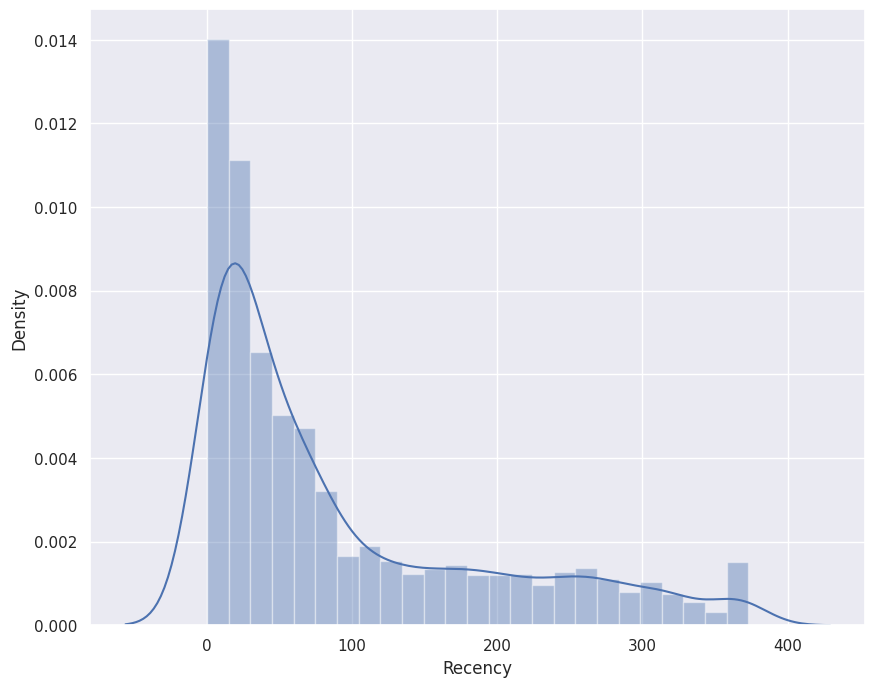

In [55]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x)


In [56]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

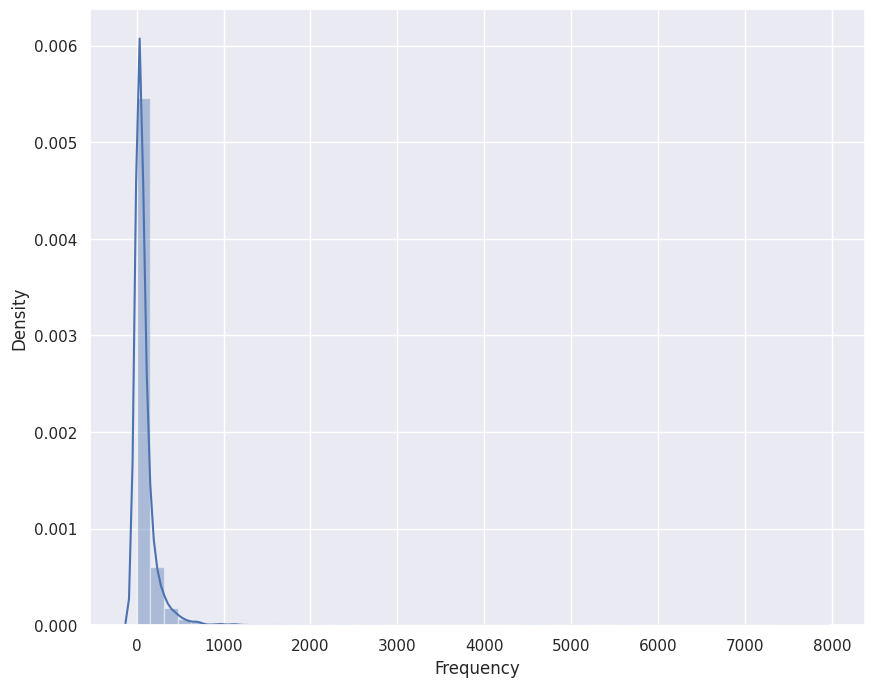

In [57]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x)

In [58]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()


count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

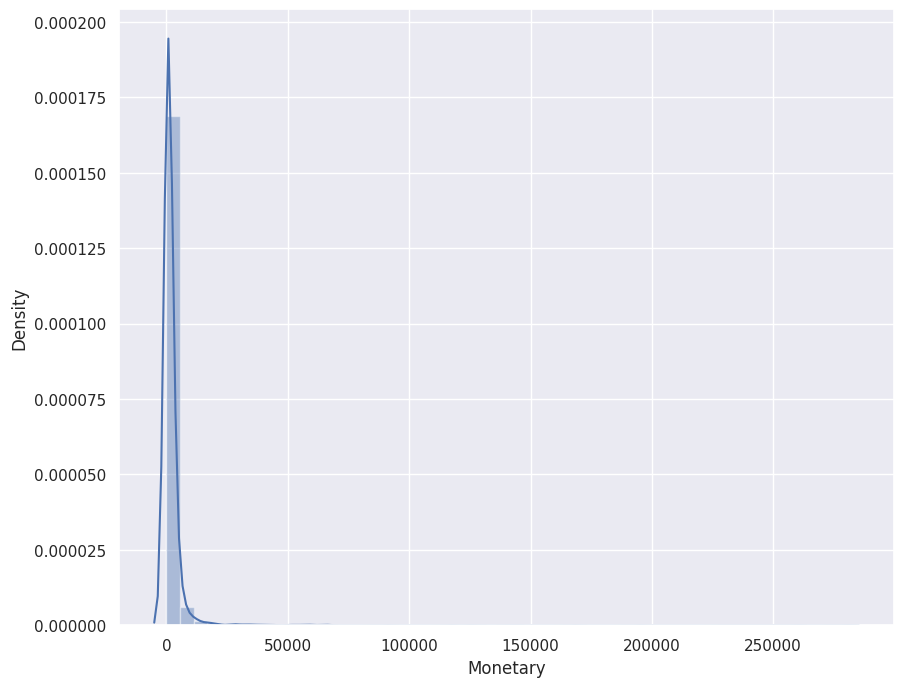

In [59]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x)

***From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.***

# **Splitting into four segments using quantiles.**

In [60]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [61]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [62]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [63]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [64]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [65]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<Axes: xlabel='Recency', ylabel='Density'>

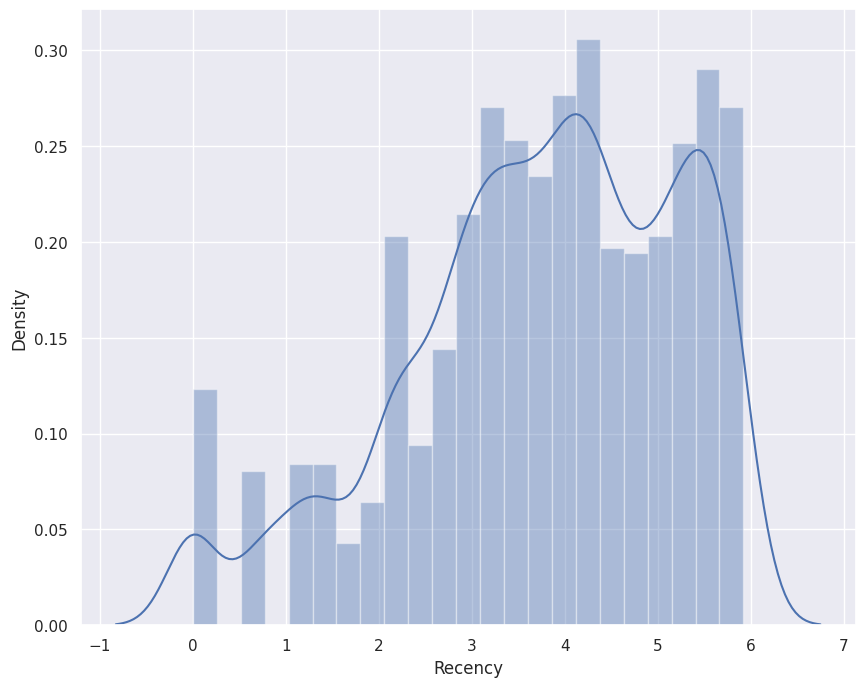

In [66]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot)

<Axes: xlabel='Frequency', ylabel='Density'>

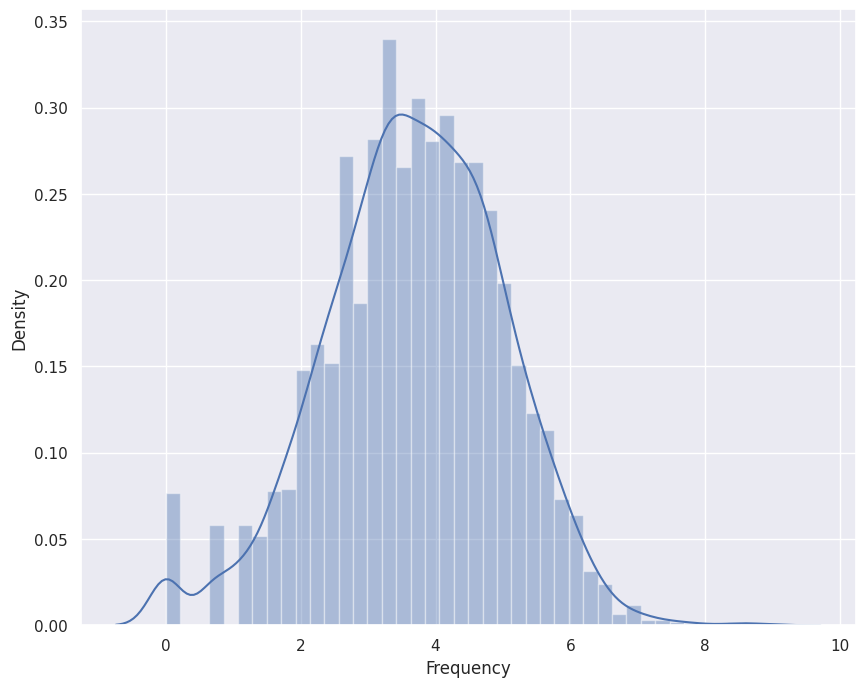

In [67]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot)

<Axes: xlabel='Monetary', ylabel='Density'>

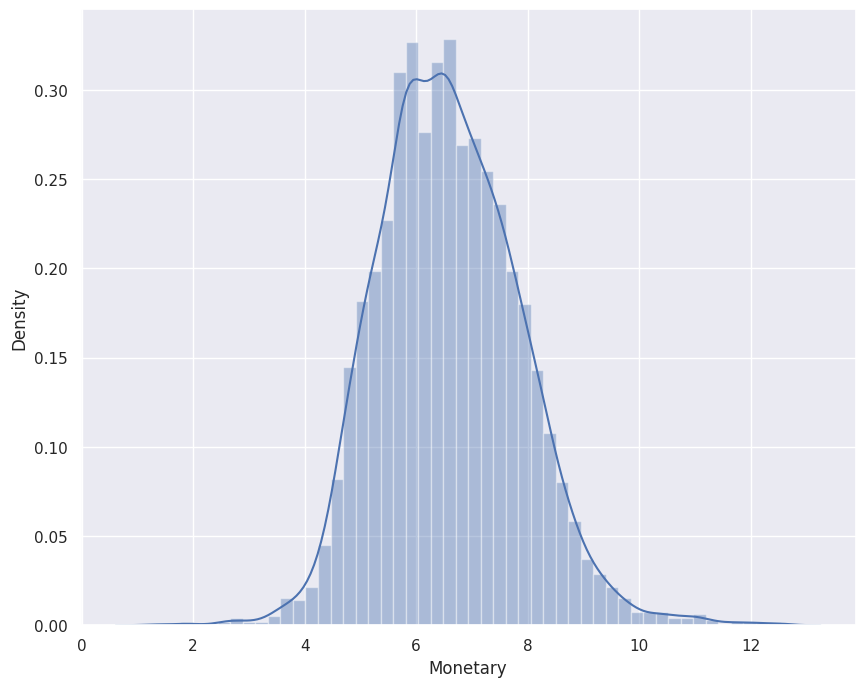

In [68]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot)


***As we can see from the above plots, skewness has been removed from the data.***

In [69]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **Visualizing the relationship between R, F and M.**

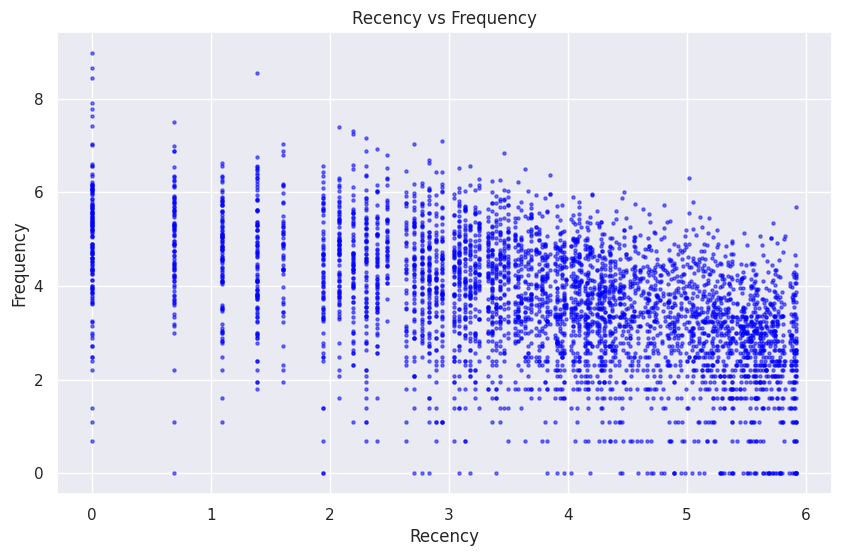

In [70]:
# Scatter plot for Recency vs Frequency
plt.figure(figsize=(10, 6))
plt.scatter(rfm_df['Recency_log'], rfm_df['Frequency_log'], s=5, c='blue', alpha=0.5)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

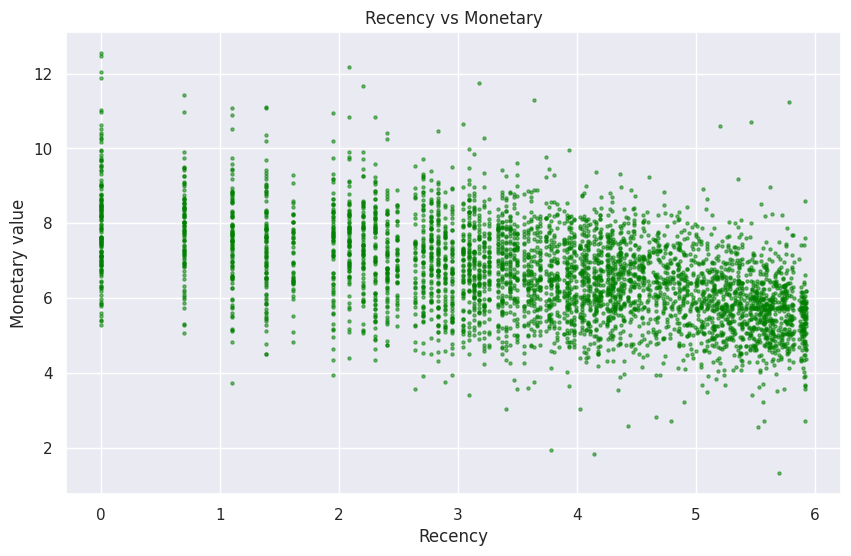

In [71]:
# Scatter plot for Recency vs Monetary
plt.figure(figsize=(10, 6))
plt.scatter(rfm_df['Recency_log'], rfm_df['Monetary_log'], s=5, c='green', alpha=0.5)
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary value')
plt.show()


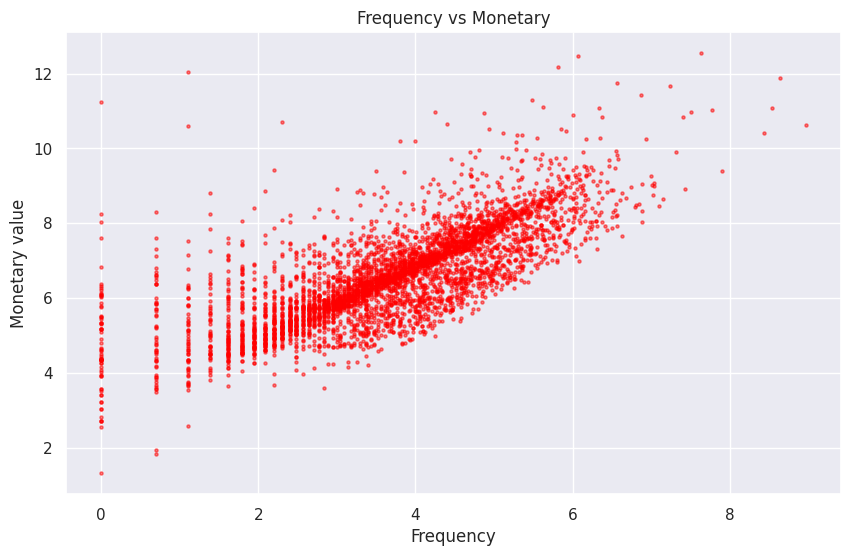

In [72]:
# Scatter plot for Frequency vs Monetary
plt.figure(figsize=(10, 6))
plt.scatter(rfm_df['Frequency_log'], rfm_df['Monetary_log'], s=5, c='red', alpha=0.5)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary value')
plt.show()